In [16]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def property(T):
        Tf = (T+300)/2
        density = 1.1614 + (Tf-300)/(350-300)*(0.995-1.1614)
        viscosity = (184.6 + (Tf-300)/(350-300)*(208.2-184.6))*10**-7
        conductivity = (26.3 + (Tf-300)/(350-300)*(30.0-26.3))*10**-3
        Pr = (0.707 + (Tf-300)/(350-300)*(0.70-0.707))
        return(density,viscosity,conductivity,Pr)

def Nu_cal(Re_num, Pr):

    if (Re_num<5*10**5):
        return 0.664*Re_num**0.5*Pr*0.33
    else:
        return (0.037*Re_num**0.8*-871)*Pr*0.33

I, k,Pr,s,l,Ts, Too = sp.symbols("I, k,Pr,s,l,T_s, T_oo")
Re, rho,t, mu, v, Nu = sp.symbols("Re, rho,t, mu, v, Nu")
dI, dv = sp.symbols("dI, dv")
Q1, Q2 = sp.symbols("Q_1, Q_2")
Err = sp.Symbol("Err")
w = sp.Symbol('w')

eq_Re = sp.Eq(Re,rho*v*w/mu)
eq_Q1 = sp.Eq(Q1, I**2*s*l/w/t)
eq_Q2 = sp.Eq(Q2, k/w*Nu *2*w*l*(Ts-Too))

l_num = 0.01
s_num = 10.6 * 10**-8
Too_num = 300


In [17]:
v_max = 50
I_max = 0.2
w_max = 2

In [18]:
temp_acc = 0.1
w_acc = 0.1

values_1 = {v:v_max, I:I_max, l:l_num,s:s_num, Too:Too_num}

Error = 10**10
W = 0
temperature = 0

T_step = int((328-312)/temp_acc)
w_step = int(2/w_acc)


for temp in np.linspace(313,328,T_step):
    prop = property(temp)
    values_2 = {k:prop[2], mu:prop[1], rho: prop[0], Pr:prop[3]}
    for width in np.linspace(0.1,2,w_step):
        wid = width * 10**-3
        thickness = wid/1000
        Re_num = prop[0]*v_max*wid/prop[1]
        Nu_num = Nu_cal(Re_num,prop[3])       
        values_3 = {Nu:Nu_num, Re:Re_num, Ts:temp, t:thickness, w:wid}
        eq_Err = eq_Q1.rhs - eq_Q2.rhs
        Error_temp = abs(eq_Err.subs(values_1).subs(values_2).subs(values_3))
        if Error_temp< Error:
            W = width
            temperature = temp
            Error = Error_temp

print("width = ", end="")
print(W) 
print("Temperature = ", end="")
print(temperature)
print("Error = ", end="")
print(Error)


width = 0.7999999999999999
Temperature = 316.20754716981133
Error = 6.67517086488656e-5


In [19]:
equation = sp.Eq(eq_Q1.rhs,eq_Q2.rhs)

prop = property(temperature)

values_1 = {l:l_num,s:s_num, Too:Too_num, k:prop[2],w:W*10**-3, t:W*10**-6, Ts:temperature}
eq_1 = equation.subs(values_1)

x = [i for i in range(1,51)]
y = []
print(x)

for v in x:
    Re_num = prop[0]*v*W*10**-3/prop[1]
    Nu_num = Nu_cal(Re_num, prop[3])
    values_2 = {Nu:Nu_num}
    i = sp.solve(eq_1.subs(values_2),I)
    y.append(i[1])

print(y)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0.0751741614925484, 0.0893976477113021, 0.0989347603858367, 0.106312318722787, 0.112411590767209, 0.117653920971927, 0.122276529129063, 0.126427365837576, 0.130205467121482, 0.133680663549140, 0.136904197506566, 0.139914879927783, 0.142742872037865, 0.145412118438120, 0.147941973363375, 0.150348322985097, 0.152644381296931, 0.154841267913119, 0.156948436196106, 0.158973996230922, 0.160924962380789, 0.162807445748546, 0.164626805725234, 0.166387770704871, 0.168094535248885, 0.169750839043352, 0.171360031622922, 0.172925125854230, 0.174448842458840, 0.175933647331268, 0.177381783017144, 0.178795295422604, 0.180176056602507, 0.181525784303498, 0.182846058805106, 0.184138337498323, 0.185403967559533, 0.186644197012960, 0.187860184423238, 0.189053007418228, 0.190223670208764, 0.191373110244779, 0.1925

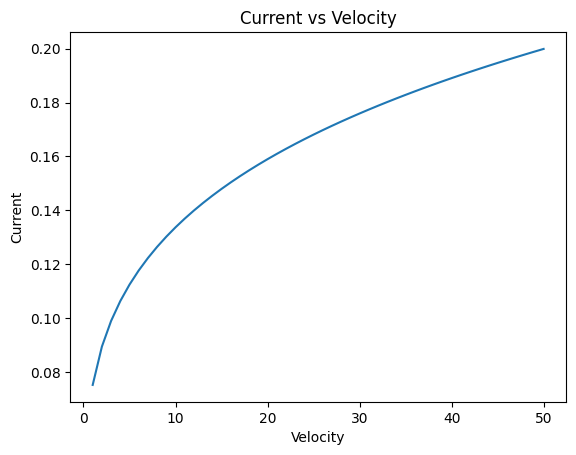

In [20]:
plt.plot(x, y)
plt.title('Current vs Velocity')
plt.xlabel('Velocity')
plt.ylabel('Current')
plt.show()